In [9]:
# Pandas for managing datasets
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

# Numpy, Statistics and Random for math
import numpy as np
import random as rand
import statistics
import scipy.signal

# Warnings to remove complex to real warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit Learn for Machine Learning
import sklearn
from sklearn import metrics 
from sklearn.naive_bayes import GaussianNB

In [10]:
frames = []
for i in range(0, 9):
    data = pd.read_csv('Data\\'+str(i)+'.csv')
    frames.append(data)    
    data.to_csv('Data\\'+str(i)+'Labels.csv', sep=',', header=False, columns=['label'])
combined = pd.concat(frames)
combined.to_csv('Data\Combined.csv', sep=',')

In [11]:
windows = []
for i in range(0, 9):
    windows.append(pd.read_csv('Data\\'+str(i)+'.csv'))

In [12]:
def splitDataFrameIntoSmaller(df, chunkSize = 10000): 
    listOfDf = list()
    numberChunks = len(df) // chunkSize + 1
    for i in range(numberChunks):
        listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
    return listOfDf

def energy(array, wSize):
    array = map(int, array)
    fft = np.fft.fft(array)
    sum = 0
    for i in range(0, len(fft)):
        sum = sum + (fft[i]*fft[i])
    return float(sum)/wSize

def correlation(x, y):
    corr = np.corrcoef(x, y)
    sum = 0
    for i in range(0, len(corr)):
        for j in range(0, len(corr[i])):
            sum = sum + corr[i][j]
    return sum/4

def mean(x):
    return np.mean(x, dtype=np.float64)

#print correlation([3.12341325, 2.123123124,1.23123123, 1.231241241,3.31231231], [3.312412412, 2.13124124124, 2.31231231, 1.41241241, 2.31231233])

print len(windows)
features = []
for i in range(0, len(windows)):
    #print 'i'+str(i)
    for j in range(9, 150, 6):
        #print 'j'+str(j)
        data = splitDataFrameIntoSmaller(windows[i], j)
        #print len(data)
        for k in range(0, len(data)-1):

            ID = data[k]['participantID'].values[0]
            windowSize = float(j)
            gyro1 = map(float,data[k]['gyro1'])
            gyro2 = map(float,data[k]['gyro2'])
            gyro3 = map(float,data[k]['gyro3'])
            accel1 = map(float,data[k]['accel1'])
            accel2 = map(float,data[k]['accel2'])
            accel3 = map(float,data[k]['accel3'])
            label = data[k]['labelnum'].values[0]
            
            features.append([ID, windowSize, mean(gyro1), statistics.stdev(gyro1), energy(gyro1, j), 
                                        mean(gyro2), statistics.stdev(gyro2), energy(gyro2, j), 
                                        mean(gyro3), statistics.stdev(gyro3), energy(gyro3, j), 
                                        mean(accel1), statistics.stdev(accel1), energy(accel1, j), 
                                        mean(accel2), statistics.stdev(accel2), energy(accel2, j), 
                                        mean(accel3), statistics.stdev(accel3), energy(accel3, j), 
                                        correlation(gyro1,gyro2), correlation(gyro1,gyro3), 
                                        correlation(gyro1,accel1), correlation(gyro1,accel2), 
                                        correlation(gyro1,accel3), 
                                        correlation(gyro2,gyro3), correlation(gyro2,accel1),
                                        correlation(gyro2,accel2), correlation(gyro2,accel3),
                                        correlation(gyro3,accel1), correlation(gyro3,accel2),
                                        correlation(gyro3,accel3),
                                        correlation(accel1,accel2), correlation(accel1,accel2),
                                        correlation(accel2,accel3), label])
        #dataFrame.to_csv('Data\\'+str(i)+' '+str(j)+'.csv', sep=',', header=False)
dataFrame = pd.DataFrame(data=features) 
dataFrame.columns = ['participantID','windowSize','mg1','stdevg1','energyg1','mg2','stdevg2','energyg2','mg3','stdevg3','energyg3','ma1','stdeva1','energya1','ma2','stdeva2','energya2','ma3','stdeva3','energya3','g1g2','g1g3','g1a1','g1a2','g1a3','g2g3','g2a1','g2a2','g2a3','g3a1','g3a2','g3a3','a1a2','a1a3','a2a3','label']
dataFrame.to_csv('Data\Windows.csv', sep=',', index=False)


9


In [6]:
items = rand.sample([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 3)
print items # 125

[7, 6, 5]


In [7]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

data = pd.read_csv('Data\Windows.csv')
data = clean_dataset(data)
#print data.head()
dataColumns = ['mg1','stdevg1','energyg1','mg2','stdevg2','energyg2','mg3','stdevg3','energyg3','ma1','stdeva1','energya1','ma2','stdeva2','energya2','ma3','stdeva3','energya3','g1g2','g1g3','g1a1','g1a2','g1a3','g2g3','g2a1','g2a2','g2a3','g3a1','g3a2','g3a3','a1a2','a1a3','a2a3']
'''
trainDataValues = data.query('(participantID==0 or participantID==1) and windowSize==9 and label!=1').filter(items=dataColumns)
trainLabels = data.query('(participantID==0 or participantID==1) and windowSize==9 and label!=1').filter(items=['label'])
testDataValues = data.query('participantID==3 and windowSize==9 and label!=1').filter(items=dataColumns)
testLabels = data.query('participantID==3 and windowSize==9 and label!=1').filter(items=['label'])

mnb = GaussianNB()
mnb.fit(trainDataValues, trainLabels)
predicted = mnb.predict(testDataValues)
print(metrics.classification_report(testLabels, predicted))
print(metrics.confusion_matrix(testLabels, predicted))
'''
accuracy = {}
matrix = []
chart = []
for i in range(9, 150, 6):
    mean = []
    windowSize = (i/3)*200
    for j in range(0, len(items)):
        string = '('
        string2 = ''
        for k in range(0, len(items)):
            if k != j:
                string += 'participantID=='+str(items[k])+' or '
                #if k < (len(items)-1):
                #    string += ' or '
            else:
                string2 += 'participantID=='+str(items[k])
        
        string = string[:-3] + ') and windowSize=='+str(i)+' and label!=1'
        string2 += ' and windowSize=='+str(i)+' and label!=1'
        trainDataValues = data.query(string).filter(items=dataColumns)
        trainLabels = data.query(string).filter(items=['label'])
        testDataValues = data.query(string2).filter(items=dataColumns)
        testLabels = data.query(string2).filter(items=['label'])

        mnb = GaussianNB()
        mnb.fit(trainDataValues, trainLabels)
        predicted = mnb.predict(testDataValues)
        fold = metrics.accuracy_score(testLabels,predicted)
        mean.append(fold)
        matrix.append([windowSize,fold,items[j]])
        #accuracy.update({metrics.accuracy_score(testLabels,predicted):i})
    chart.append([windowSize,np.mean(mean)])
    accuracy.update({np.mean(mean):windowSize})
matrix = pd.DataFrame(matrix, columns=['windowSize','accuracy','participantID'])
matrix.to_csv('Data\windowResults.csv', sep=',', index=False)
#print accuracy
#print matrix
chart = pd.DataFrame(chart, columns=['windowSize','accuracy'])

Text(0,0.5,u'Accuracy')

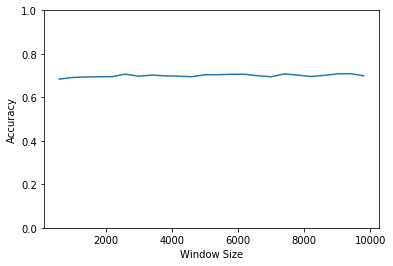

In [13]:
y = chart['accuracy']
x = chart['windowSize']
plt.plot(x, y)
plt.ylim(0, 1)
plt.xlabel('Window Size')
plt.ylabel('Accuracy')